In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick


df = pd.read_csv("../data/insurance_cleaned.csv")  


df.columns = (
    df.columns.str.strip()
              .str.upper()               
              .str.replace(' ', '_')     
              .str.replace('[^0-9A-Z_]', '', regex=True)
)

In [2]:
media_charges = df['CHARGES'].mean()
print(f"💰 Custo médio anual do seguro: ${media_charges:,.2f}")


media_fumantes = df[df['SMOKER'] == 'yes']['CHARGES'].mean()
media_nao_fumantes = df[df['SMOKER'] == 'no']['CHARGES'].mean()
print(f"🚬 Fumantes: ${media_fumantes:,.2f}, Não fumantes: ${media_nao_fumantes:,.2f}")

💰 Custo médio anual do seguro: $13,279.12
🚬 Fumantes: $32,050.23, Não fumantes: $8,440.66


In [3]:
df['BMI_CAT'] = pd.cut(df['BMI'], bins=[0, 18.5, 25, 30, 100],
                       labels=['Abaixo do peso', 'Normal', 'Sobrepeso', 'Obeso'])
media_bmi_formatada = df.groupby('BMI_CAT')['CHARGES'].mean().apply(lambda x: f"${x:,.2f}")
print("\n⚖️ Custo médio por categoria de BMI:")
print(media_bmi_formatada)


⚖️ Custo médio por categoria de BMI:
BMI_CAT
Abaixo do peso     $8,657.62
Normal            $10,435.44
Sobrepeso         $10,997.80
Obeso             $15,580.70
Name: CHARGES, dtype: object


C:\Users\Mario\AppData\Local\Temp\ipykernel_23148\319908134.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_bmi_formatada = df.groupby('BMI_CAT')['CHARGES'].mean().apply(lambda x: f"${x:,.2f}")


In [4]:
media_por_filhos = df.groupby('CHILDREN')['CHARGES'].mean()
print("\n👶 Custo médio por número de filhos:")
for filhos, valor in media_por_filhos.items():
    print(f"{filhos} filhos: ${valor:,.2f}")



👶 Custo médio por número de filhos:
0 filhos: $12,384.70
1 filhos: $12,731.17
2 filhos: $15,073.56
3 filhos: $15,355.32
4 filhos: $13,850.66
5 filhos: $8,786.04


C:\Users\Mario\AppData\Local\Temp\ipykernel_23148\63714283.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=media_por_filhos.index, y=media_por_filhos.values, palette="coolwarm")


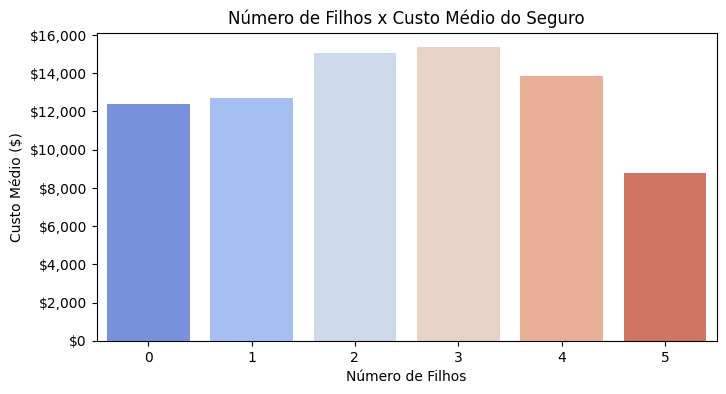


🤖 Machine Learning:
Modelo Random Forest Regressor consegue prever o custo do seguro com:
• R² ~ 0.88 → explica ~88% da variação do custo
• RMSE ~ $4,700 → erro médio nas previsões
As features mais importantes para previsão são: Fumante, BMI, Idade, Sexo, Número de filhos e Região.
Isso complementa os insights anteriores, permitindo estimar o custo individualmente.


In [5]:

# Gráfico número de filhos x custo médio
plt.figure(figsize=(8,4))
sns.barplot(x=media_por_filhos.index, y=media_por_filhos.values, palette="coolwarm")
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
plt.title("Número de Filhos x Custo Médio do Seguro")
plt.xlabel("Número de Filhos")
plt.ylabel("Custo Médio ($)")
plt.show()

# Insight de ML
print("\n🤖 Machine Learning:")
print("Modelo Random Forest Regressor consegue prever o custo do seguro com:")
print("• R² ~ 0.88 → explica ~88% da variação do custo")
print("• RMSE ~ $4,700 → erro médio nas previsões")
print("As features mais importantes para previsão são: Fumante, BMI, Idade, Sexo, Número de filhos e Região.")
print("Isso complementa os insights anteriores, permitindo estimar o custo individualmente.")
